Suraj Kesavan
suraj.msec@gmail.com

About Data

With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

The submission will be evaluated using the RMSLE metric. 
One can use np.sqrt(mean_squared_log_error(actual, predicted))

submission_df.to_csv('my_submission_file.csv', index=False)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import datetime as dt 
import random
from scipy.stats import chi2, chi2_contingency, pearsonr, spearmanr, zscore, kruskal, f_oneway


In [3]:
train_df = pd.read_csv(r"E:\conda_workdir\hacks\car_price_prediction\train.csv")
test_df  = pd.read_csv(r"E:\conda_workdir\hacks\car_price_prediction\test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [5]:
train_df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Inference: the price range is varying between a very wide range of values a vehicle need to investigate the both outer bands of the range because by the info from used car webites the average price is from 300 usd to 300000

production year goes all the way back to 1939 which means this can go either way the vehicles can be sold off at high price considering its antique or it is not a rare one and it goes at very low price

the cylinders can affect the volume of the engine which can add to the increase in price but not neccessarily because there are so many other variables that affect the price of the car

the airbags of the car are kind of a safety feature which can also increase the price of the car on average there are 2 or 4 airbags in most cars these 12-16 kinda seem rare

In [4]:
train_df1 = train_df.copy(deep=True)
test_df1 = test_df.copy(deep=True)

In [5]:
train_df1.drop_duplicates(inplace=True)

In [6]:
train_df1.rename(columns = {'Prod. year':'Prod_Year', 'Leather interior': 'Leather_Interior', 'Fuel type':'Fuel_Type', 'Engine volume':'Engine_volume', 'Gear box type': 'Gear_Box_Type', 'Drive wheels':'Drive_Wheels' }, inplace = True)
test_df1.rename(columns = {'Prod. year':'Prod_Year', 'Leather interior': 'Leather_Interior', 'Fuel type':'Fuel_Type', 'Engine volume':'Engine_volume', 'Gear box type': 'Gear_Box_Type', 'Drive wheels':'Drive_Wheels' }, inplace = True)

In [127]:
train_df.Doors.value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [7]:
# replace the door values which have misplaced date values. The door values are 4 and 2 respectively from looking at the car images for the models

def replace_door_values(x):
    if x == '04-May':
        return '4'
    elif x == '02-Mar':
        return '2'
    elif x == '>5':
        return '5'

train_df1.Doors = train_df1.Doors.apply(lambda x:replace_door_values(x))
test_df1.Doors = test_df1.Doors.apply(lambda x:replace_door_values(x))
    

In [8]:
#converting mileage from sting to integer 

pattern = "[a-zA-Z ]"

train_df1.Mileage = train_df1.Mileage.apply(lambda x:int(re.sub(pattern,'', x)))
test_df1.Mileage = test_df1.Mileage.apply(lambda x:int(re.sub(pattern,'', x)))

In [9]:
# replacing with zero since some states in us dont have levy

train_df1.Levy.replace(to_replace='-', value=0, inplace=True)
test_df1.Levy.replace(to_replace='-', value=0, inplace=True)

train_df1.Levy = train_df1.Levy.astype('int')
test_df1.Levy = test_df1.Levy.astype('int')

In [10]:
# considering the zero levy in states where there is no levy

train_df1["Is_No_Levy"] = train_df1.Levy.apply(lambda x:1 if x == 0 else 0)
test_df1["Is_No_Levy"] = test_df1.Levy.apply(lambda x:1 if x == 0 else 0)

In [11]:
train_df1['Vehicle_Age'] = dt.date.today().year - train_df1.Prod_Year
test_df1['Vehicle_Age'] = dt.date.today().year - test_df1.Prod_Year

In [12]:
# removing turbo from engine volume since there very few records with this
train_df1.Engine_volume = train_df1.Engine_volume.apply(lambda x:float(re.sub("[a-zA-Z ]",'', x)))
test_df1.Engine_volume = test_df1.Engine_volume.apply(lambda x:float(re.sub("[a-zA-Z ]",'', x)))

In [13]:
train_df1.Wheel.replace(to_replace="Left wheel", value="Left", inplace=True)
train_df1.Wheel.replace(to_replace="Right-hand drive", value="Right", inplace=True)
train_df1.Drive_Wheels.replace(to_replace="4x4", value="Four", inplace=True)

test_df1.Wheel.replace(to_replace="Left wheel", value="Left", inplace=True)
test_df1.Wheel.replace(to_replace="Right-hand drive", value="Right", inplace=True)
test_df1.Drive_Wheels.replace(to_replace="4x4", value="Four", inplace=True)

In [14]:
train_df1_model_fname = train_df1.copy(deep=True)
train_df1_model_fname.Model = train_df1_model_fname.Model.apply(lambda x:x.lower().split(' ')[0])

test_df1.Model = test_df1.Model.apply(lambda x:x.lower().split(' ')[0])

In [15]:
train_df1_model_fname.Model = train_df1_model_fname.Model.apply(lambda x:re.sub("[^A-Za-z0-9 ]+",'', x.lower()))
test_df1.Model = test_df1.Model.apply(lambda x:re.sub("[^A-Za-z0-9 ]+",'', x.lower()))

In [22]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int32  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod_Year         18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather_Interior  18924 non-null  object 
 8   Fuel_Type         18924 non-null  object 
 9   Engine_volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear_Box_Type     18924 non-null  object 
 13  Drive_Wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

##### Univariate Analysis

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

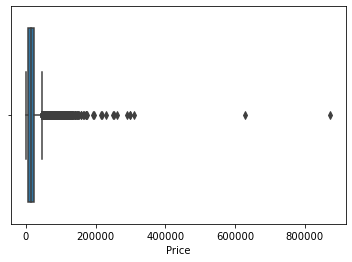

In [23]:
sns.boxplot(train_df1.Price[(train_df1.Price>1) & (train_df1.Price<2630750)])

the price variable is skewd distribution which is usually the case for these kind of features and also there are two very clear outliers which we can investigate

In [1]:
# checking the outlier spikes

'''train_df1[(train_df1.Price>400000) & (train_df1.Price<2630750)]
train_df1[(train_df1.Price>2630750)]'''

'train_df1[(train_df1.Price>400000) & (train_df1.Price<2630750)]\ntrain_df1[(train_df1.Price>2630750)]'

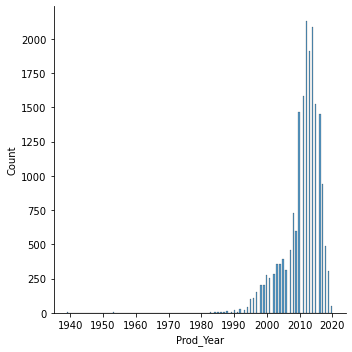

In [26]:
sns.displot(train_df1.Prod_Year)

producition year seems to be mostly concentrated between 2000 and 2020 which is because only recently bought cars have functional value to be sold as used cars

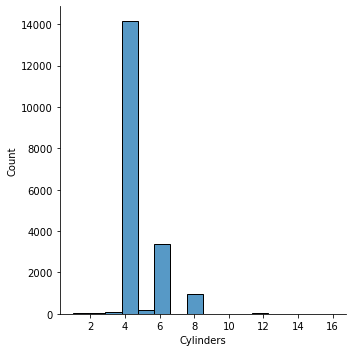

In [27]:
sns.displot(train_df1.Cylinders)

Most cars have 4 clyinders which is probably the most affordable fuel efficient design for everyday cars

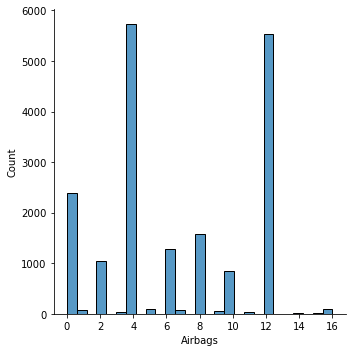

In [28]:
sns.displot(train_df1.Airbags)

contrary to the assumption before most cars have 4 or 12 airbags and not 2 and a lot of cars are there with 0 airbags

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Hatchback'),
  Text(2, 0, 'Sedan'),
  Text(3, 0, 'Microbus'),
  Text(4, 0, 'Goods wagon'),
  Text(5, 0, 'Universal'),
  Text(6, 0, 'Coupe'),
  Text(7, 0, 'Minivan'),
  Text(8, 0, 'Cabriolet'),
  Text(9, 0, 'Limousine'),
  Text(10, 0, 'Pickup')])

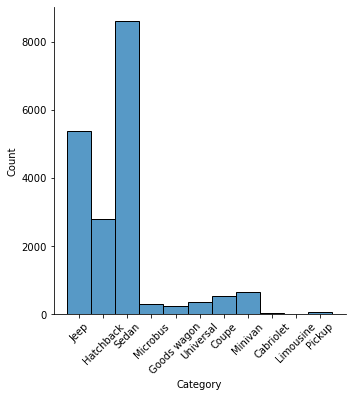

In [29]:
sns.displot(train_df1.Category)
plt.xticks(rotation = 45)

A sedan seems to be the most popular vehicle type followed by jeep and then the hatchback 

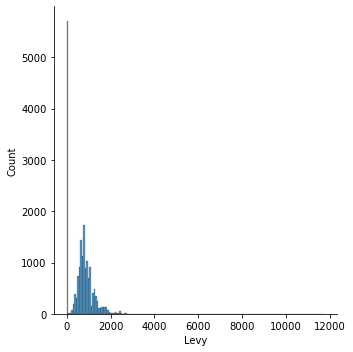

In [30]:
sns.displot(train_df1.Levy)

the levy or the tax has a skewed distribution which needs to be investigated because tax is usually a fixed percentage for a range of values and no matter how high the price goes the tax shouldnt be very high because of this
also apparently in some places there are no taxes which has been showed as 0 here

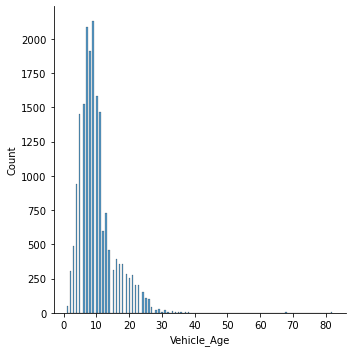

In [31]:
sns.displot(train_df1.Vehicle_Age)

Most features have a highly skewed distribution

##### Bivariate Analysis

<AxesSubplot:xlabel='Color'>

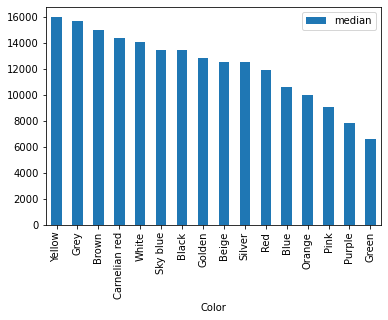

In [33]:
train_df1.groupby(['Color'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

we can see that there is siginificant difference between the price range for colors like green, purple, pink and yellwo, grey, brown

<AxesSubplot:xlabel='Wheel'>

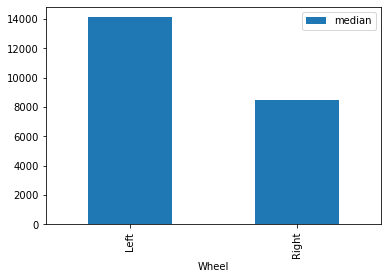

In [34]:
train_df1.groupby(['Wheel'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

based on which side wheel is rarely used in that place the other one will have a lower price

<AxesSubplot:xlabel='Doors'>

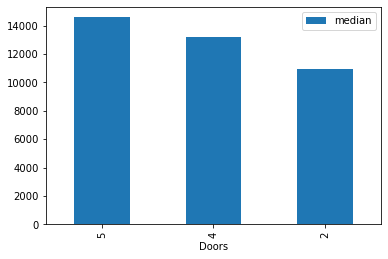

In [35]:
train_df1.groupby(['Doors'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

the price differ by doors because generally more door implies the size of car is bigger 

<AxesSubplot:xlabel='Drive_Wheels'>

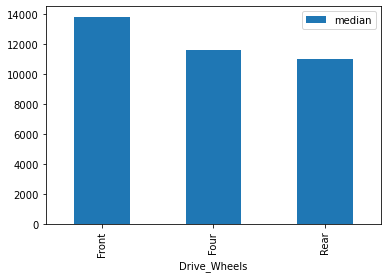

In [36]:
train_df1.groupby(['Drive_Wheels'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

not much difference in price range for drive_wheels

<AxesSubplot:xlabel='Fuel_Type'>

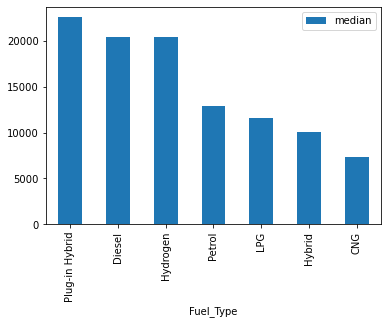

In [37]:
train_df1.groupby(['Fuel_Type'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

Diesel, Hydrogen and plugin hybrid vehicles have a visibly higher price range than others

<AxesSubplot:xlabel='Gear_Box_Type'>

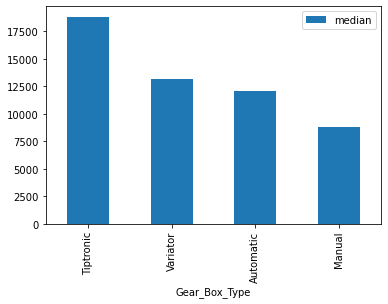

In [38]:
train_df1.groupby(['Gear_Box_Type'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

Tiptronic type gear box fall into a relatively higher price range than others

<AxesSubplot:xlabel='Cylinders'>

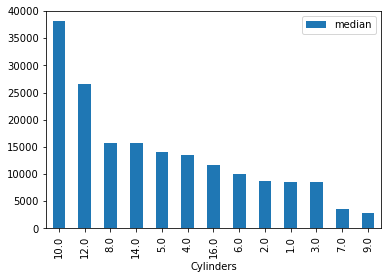

In [39]:
train_df1.groupby(['Cylinders'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

from the previous distribution graphs we saw that most cars have 4,6 or 8 cylinders and they fall into price range that is lower than that of 10 and 12 cylinder engines

<AxesSubplot:xlabel='Category'>

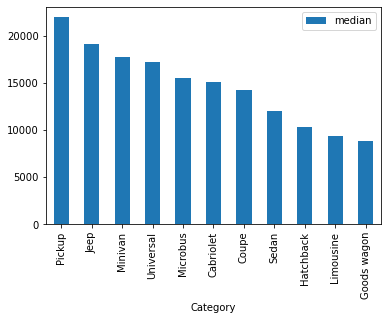

In [40]:
train_df1.groupby(['Category'])['Price'].agg(['median']).sort_values('median', ascending=False).plot(kind='bar')

the most preferred car type which was the sedan falls into the lower price range when compared to the jeep which falls into the higher price range 

In [41]:
train_df1.groupby(['Drive_Wheels'])['Cylinders'].count()

Drive_Wheels
Four      3969
Front    12695
Rear      2260
Name: Cylinders, dtype: int64

Using Kruskal wallis to check for siginificant difference between groups, if there is significant difference between groups then the tree based models will be abled to make better splits there by increasing the performance

In [42]:
from scipy.stats import ttest_ind

#ttest_ind(np.log(train_df1[train_df1['Is_No_Levy']==1].Price), np.log(train_df1[train_df1['Is_No_Levy']==0].Price))
ttest_ind(np.log(train_df1[train_df1['Leather_Interior']=='Yes'].Price), np.log(train_df1[train_df1['Leather_Interior']=='No'].Price))

Ttest_indResult(statistic=-3.046755264417677, pvalue=0.002316446131168642)

In [43]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Gear_Box_Type")])

KruskalResult(statistic=1211.7042541019284, pvalue=2.1171943376581055e-262)

In [44]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Category")])

KruskalResult(statistic=1027.3972352023231, pvalue=2.3417236478219842e-214)

In [45]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Fuel_Type")])

KruskalResult(statistic=1559.618771417586, pvalue=0.0)

In [46]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Color")])

KruskalResult(statistic=222.678082075303, pvalue=5.046814740371052e-39)

In [47]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Cylinders")])

KruskalResult(statistic=181.4053538472009, pvalue=2.195757637904776e-32)

In [48]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Leather_Interior")])

KruskalResult(statistic=92.53973531478829, pvalue=6.598651246025537e-22)

In [49]:
kruskal(*[group["Price"].values for name, group in train_df1.groupby("Airbags")])

KruskalResult(statistic=2979.140106625147, pvalue=0.0)

The samples of the categorical variables passed the F test so we will go ahead and include those in prediction

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Levy', ylabel='Price'>

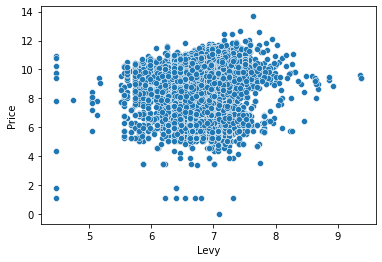

In [50]:
sns.scatterplot(x=np.log(train_df1['Levy']), y=np.log(train_df1.Price))

In [128]:
# not much of correlation betweem levy and price variable

spearmanr(train_df1['Levy'], train_df1.Price)

SpearmanrResult(correlation=0.0015412288374021612, pvalue=0.8321034908662627)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

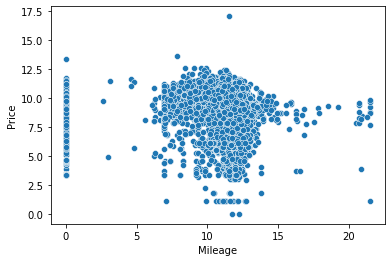

In [51]:
sns.scatterplot(x=np.log(train_df1['Mileage']+1), y=np.log(train_df1.Price))

In [52]:
# mileage clearly is being inflated here considering most cars have a 6 figit odometer, hence 
# investigating this mileage range to see if there are other characterstics that have led to this

train_df1[(train_df1['Mileage']>1147484) & (train_df1['Mileage']<2147484) ]

,ID,Price,Levy,Manufacturer,Model,Prod_Year,Category,Leather_Interior,Fuel_Type,Engine_volume,Mileage,Cylinders,Gear_Box_Type,Drive_Wheels,Doors,Wheel,Color,Airbags,Is_No_Levy,Vehicle_Age
493,45781924,15994,777,TOYOTA,Camry,2014,Sedan,No,Petrol,2.5,1440000,4.0,Automatic,Front,4,Left,Silver,0,0,7
5866,45812446,19757,0,TOYOTA,Prius,2012,Sedan,No,Hybrid,1.8,1360000,4.0,Automatic,Front,4,Left,Silver,10,1,9
8242,45781454,7213,1437,OPEL,Astra,2004,Goods wagon,No,Diesel,1.7,1800000,4.0,Manual,Front,4,Left,Silver,6,0,17
8427,45809748,13172,0,FORD,Transit,2006,Microbus,No,Diesel,2.2,1500000,5.0,Manual,Front,2,Left,White,8,1,15
9145,45795180,5959,2004,MERCEDES-BENZ,240,1998,Sedan,No,Petrol,2.4,1700000,6.0,Automatic,Rear,4,Left,Silver,6,0,23
10026,45755802,19444,0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,1888000,4.0,Variator,Front,4,Left,White,10,1,11
10644,45798097,12287,1047,HYUNDAI,Elantra,2007,Sedan,Yes,Diesel,1.6,1678000,4.0,Automatic,Front,4,Left,Silver,4,0,14
14134,45798503,26657,0,HYUNDAI,Elantra,2016,Sedan,No,Petrol,2.0,1624000,4.0,Tiptronic,Front,4,Left,White,12,1,5
14235,45776576,17562,0,TOYOTA,Prius,2009,Hatchback,Yes,Hybrid,1.8,2005000,4.0,Variator,Front,4,Left,White,8,1,12
14508,45480524,8781,0,HONDA,Cr-v,2000,Jeep,Yes,CNG,2.0,1346320,4.0,Automatic,Four,4,Left,White,4,1,21


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Price'>

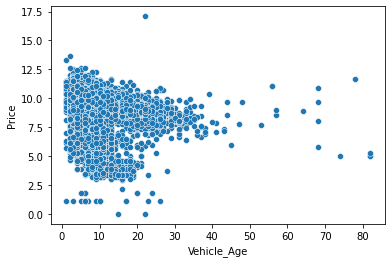

In [53]:
sns.scatterplot(x=train_df1['Vehicle_Age'], y=np.log(train_df1.Price))

older cars have lower price ranges also the distribution of the old cars itself is very less

<AxesSubplot:xlabel='Engine_volume', ylabel='Price'>

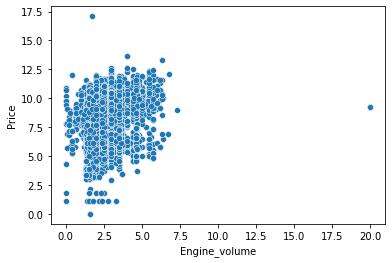

In [54]:
sns.scatterplot(x=train_df1['Engine_volume'], y=np.log(train_df1.Price))

two very clear outliers that is based on large engine volume and the other being an average value for engine volume but price is very high

In [55]:
train_df1.corr(method='spearman')

,ID,Price,Levy,Prod_Year,Engine_volume,Mileage,Cylinders,Airbags,Is_No_Levy,Vehicle_Age
ID,1.000000,0.024852,0.041101,0.024578,-0.061248,-0.031592,-0.076909,-0.048688,-0.080007,-0.024578
Price,0.024852,1.000000,0.001541,0.294835,0.055821,-0.205020,-0.029826,-0.053161,-0.009922,-0.294835
Levy,0.041101,0.001541,1.000000,0.392368,0.338997,-0.047379,0.182471,0.137999,-0.806168,-0.392368
Prod_Year,0.024578,0.294835,0.392368,1.000000,-0.040477,-0.354501,-0.162323,0.175819,-0.548246,-1.000000
Engine_volume,-0.061248,0.055821,0.338997,-0.040477,1.000000,0.158752,0.689281,0.244008,-0.038692,0.040477
Mileage,-0.031592,-0.205020,-0.047379,-0.354501,0.158752,1.000000,0.158243,-0.032149,0.089227,0.354501
Cylinders,-0.076909,-0.029826,0.182471,-0.162323,0.689281,0.158243,1.000000,0.212658,0.097639,0.162323
Airbags,-0.048688,-0.053161,0.137999,0.175819,0.244008,-0.032149,0.212658,1.000000,-0.102030,-0.175819
Is_No_Levy,-0.080007,-0.009922,-0.806168,-0.548246,-0.038692,0.089227,0.097639,-0.102030,1.000000,0.548246
Vehicle_Age,-0.024578,-0.294835,-0.392368,-1.000000,0.040477,0.354501,0.162323,-0.175819,0.548246,1.000000


The features that have the most influence on price are Vehicle's age with 29 percent and Mileage with 20 percent air bags and cylinder have some correlation of 5 percent and 3 percent respectively

features like Levy have very low correlation with Price variable

In [16]:
# this method takes in the dataframe and the column name for which we need to do outlier removal of and 
# returns a dataframe with the outliers removed based on IQR

def remove_outlier_by_iqr(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > lower_limit) & (df_in[col_name] < upper_limit)]
    return df_out


In [17]:

#train_df1_no_outlier = train_df1[(np.abs(zscore(np.log(train_df1['Price']))) < 3)]

train_df1_no_outlier = remove_outlier_by_iqr(train_df1_model_fname, "Price")


In [ ]:
'''train_df1_no_outlier = train_df1_no_outlier[(np.abs(zscore(np.log(train_df1_no_outlier['Vehicle_Age']))) < 3)]
train_df1_no_outlier = train_df1[(np.abs(zscore(np.log(train_df1['Mileage']))) < 3)]'''

In [ ]:
'''
train_df1_no_outlier = remove_outlier_by_iqr(train_df1_no_outlier, "Vehicle_Age")
train_df1_no_outlier = remove_outlier_by_iqr(train_df1_no_outlier, "Mileage")'''

In [18]:
# considering the 0 mileage cars to be used cars and imputing with median value
train_df1_no_outlier.Mileage.replace(to_replace=0, value=train_df1.Mileage.median(), inplace=True)

# since all of them are same model and the average size of this is 1.5
train_df1_no_outlier.Engine_volume.replace(to_replace=0.4, value=1.5, inplace=True)
train_df1_no_outlier.Engine_volume.replace(to_replace=0.3, value=1.5, inplace=True)
train_df1_no_outlier.Engine_volume.replace(to_replace=0.2, value=1.9, inplace=True)
train_df1_no_outlier.Engine_volume.replace(to_replace=0.1, value=1.5, inplace=True)
train_df1_no_outlier.Engine_volume.replace(to_replace=0, value=1.5, inplace=True)




D:\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
# creating a confounding variable mileage per year based on mileage and vehicle age 
# which is a prime kpi that we need to look into while buying used cars because this gives an idea of efficiency of the vehicle
# this was mainly to check that if combining these variables we can reduce one input feature in an effort to reduce ovefitting 

train_df1_no_outlier['avg_mile_age'] = round(train_df1_no_outlier['Mileage'] /train_df1_no_outlier['Vehicle_Age'],0)

bins = [0, 20000, 40000, 60000, 80000, 100000, np.inf]
labels = [1,2,3,4,5,6]
train_df1_no_outlier["avg_mileaperage_bins"] = pd.cut(train_df1_no_outlier.Mileage, bins=bins, labels=labels)

<ipython-input-19-55dcece84457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1_no_outlier['avg_mile_age'] = round(train_df1_no_outlier['Mileage'] /train_df1_no_outlier['Vehicle_Age'],0)
<ipython-input-19-55dcece84457>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1_no_outlier["avg_mileaperage_bins"] = pd.cut(train_df1_no_outlier.Mileage, bins=bins, labels=labels)


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_mileaperage_bins', ylabel='Price'>

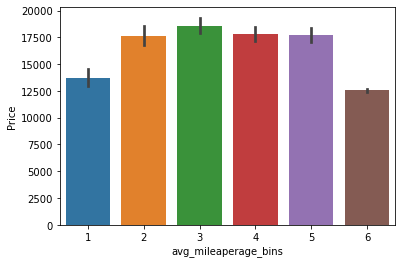

In [24]:
# binning of the mileage per year variable was done to see if there is a categorical difference between them that can help the tree based models
sns.barplot(train_df1_no_outlier["avg_mileaperage_bins"], train_df1_no_outlier['Price'])

In [20]:
# considering that odometer have only 6 digits max we will impute the milegae values above that with median
#train_df1_no_outlier[(train_df1_no_outlier.Mileage >999999)].Mileage = train_df1_no_outlier.Mileage.median

bins = [0, 20000, 40000, 60000, 80000, 100000, 200000, 300000, np.inf]
labels = [1,2,3,4,5,6,7,8]
train_df1_no_outlier["Mile_bins"] = pd.cut(train_df1_no_outlier.Mileage, bins=bins, labels=labels)
test_df1["Mile_bins"] = pd.cut(test_df1.Mileage, bins=bins, labels=labels)

<ipython-input-20-86b7d1005490>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1_no_outlier["Mile_bins"] = pd.cut(train_df1_no_outlier.Mileage, bins=bins, labels=labels)


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mile_bins', ylabel='Price'>

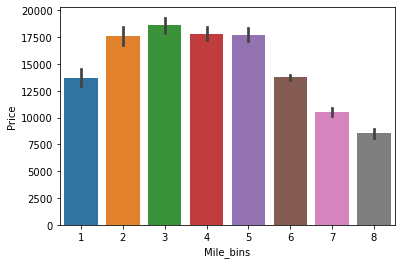

In [26]:
sns.barplot(train_df1_no_outlier["Mile_bins"], train_df1_no_outlier['Price'])

Mile bins show a clear trend where higher bins have lower price ranges but the first bin seems to show a much lower price than expected which can be investigated further

In [337]:
train_df1_no_outlier[(train_df1_no_outlier.Mile_bins==1) &  (train_df1_no_outlier.Price<10000) & (train_df1_no_outlier.Model_woe>0.5)& (train_df1_no_outlier.Vehicle_Age<5)]

,ID,Price,Levy,Manufacturer,Model,Prod_Year,Category,Leather_Interior,Fuel_Type,Engine_volume,...,Color,Airbags,Is_No_Levy,Vehicle_Age,Manufacturer_woe,Color_woe,Model_woe,Mile_bins,avg_mile_age,avg_mileaperage_bins
53,45769316,392,1017,MERCEDES-BENZ,e,2017,Sedan,1,Petrol,2.0,...,Black,12,0,4,0.65,0.70,0.53,1,400.0,1
264,45771073,392,1017,MERCEDES-BENZ,e,2017,Sedan,1,Petrol,2.0,...,Black,12,0,4,0.65,0.70,0.53,1,400.0,1
934,45647833,3450,607,TOYOTA,camry,2019,Sedan,1,Hybrid,2.5,...,Black,12,0,2,0.66,0.70,0.62,1,4813.0,1
1115,45811038,627,780,CHEVROLET,cruze,2019,Sedan,1,Petrol,1.4,...,Black,12,0,2,0.67,0.70,0.60,1,8021.0,1
1440,45772582,392,1017,MERCEDES-BENZ,e,2017,Sedan,1,Petrol,2.0,...,Black,12,0,4,0.65,0.70,0.53,1,400.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18366,45655276,706,420,KIA,niro,2019,Sedan,1,Hybrid,1.6,...,Red,12,0,2,0.71,0.63,0.85,1,1471.0,1
18577,45648025,3450,607,TOYOTA,camry,2019,Sedan,1,Hybrid,2.5,...,Black,12,0,2,0.66,0.70,0.62,1,4813.0,1
18762,45648815,3450,607,TOYOTA,camry,2019,Sedan,1,Hybrid,2.5,...,Black,12,0,2,0.66,0.70,0.62,1,4813.0,1
19065,45524811,6586,1077,TOYOTA,chr,2019,Jeep,1,Petrol,2.0,...,White,12,0,2,0.66,0.72,0.64,1,9984.0,1


In [21]:
#sns.displot(train_df1_no_outlier[train_df1_no_outlier.Mileage>4000000].Mileage)
#considering odometer to record only 6 digits 

train_df1_no_outlier = train_df1_no_outlier[train_df1_no_outlier.Mileage<999999]

In [22]:
# limiting price range from 300 and above because from used cars website the average lowest price is 300 

train_df1_no_outlier = train_df1_no_outlier[train_df1_no_outlier.Price > 300]

<AxesSubplot:xlabel='Manufacturer'>

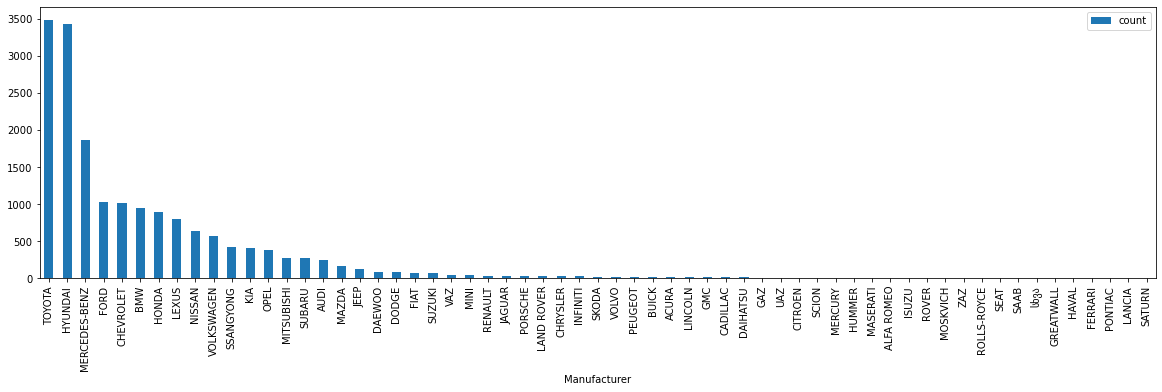

In [63]:
train_df1_no_outlier.groupby(["Manufacturer"])['Manufacturer'].agg(['count']).sort_values('count', ascending=False).plot(kind='bar', figsize=(20,5))

In [23]:
# treating the manufacturer count for cars thats less than 8 to be outliers and removing them so tcreating a list to remove those list of manufacturers

manufacturer_df = train_df1_no_outlier.groupby(["Manufacturer"])['Manufacturer'].agg(['count']).reset_index()
to_remove_manufacturer = list(manufacturer_df[manufacturer_df['count']<8].Manufacturer)

In [24]:
# these categories had very few records so these records will be removed and it can be treated by oneHotEncoder by handle Unknown parameter
train_df1_no_outlier =  train_df1_no_outlier[train_df1_no_outlier["Fuel_Type"] != "Hydrogen"]
train_df1_no_outlier = train_df1_no_outlier[~train_df1_no_outlier["Cylinders"].isin([14, 9, 7, 16])]
train_df1_no_outlier = train_df1_no_outlier[~train_df1_no_outlier["Manufacturer"].isin(to_remove_manufacturer)]
train_df1_no_outlier = train_df1_no_outlier[train_df1_no_outlier["Engine_volume"]<10]
train_df1_no_outlier = train_df1_no_outlier[~train_df1_no_outlier["Airbags"].isin([13, 15])]
train_df1_no_outlier = train_df1_no_outlier[train_df1_no_outlier["Levy"]<11000]

In [25]:
train_df1_no_outlier.Leather_Interior = train_df1_no_outlier.Leather_Interior.apply(lambda x:1 if x=="Yes" else 0).astype("int")
test_df1.Leather_Interior = test_df1.Leather_Interior.apply(lambda x:1 if x=="Yes" else 0).astype("int")


In [ ]:
'''train_df1_no_outlier['Model'].replace(dict.fromkeys(['fithybryd','fits', 'ft', 'fitfit'], 'fit', inplace=True)
train_df1_no_outlier.Model.replace(dict.fromkeys(['cruzes','cruzecruze'], 'cruze'), inplace=True)
train_df1_no_outlier.Model.replace(dict.fromkeys(['escapeescape',], 'escape'), inplace=True)
train_df1_no_outlier.Model.replace(dict.fromkeys(['transits'], 'transit'), inplace=True)
train_df1_no_outlier.Model.replace(dict.fromkeys(['fuson'], 'fusion'), inplace=True)'''


In [ ]:
'''idx = (train_df1_no_outlier.Fuel_Type.str.contains('Hybrid'))
train_df1_no_outlier.loc[idx,'Model'] = train_df1_no_outlier.Model.apply(lambda x:re.sub(re.compile(r'hybrid'),'',x))
train_df1_no_outlier.loc[idx,'Model'] = train_df1_no_outlier.Model.apply(lambda x:re.sub(re.compile(r'hibrid'),'',x))
train_df1_no_outlier.loc[idx,'Model'] = train_df1_no_outlier.Model.apply(lambda x:re.sub(re.compile(r'hbrid'),'',x))
train_df1_no_outlier.loc[idx,'Model'] = train_df1_no_outlier.Model.apply(lambda x:re.sub(re.compile(r'bybrid'),'',x))'''

#test_df1.Model = test_df1.Model.apply(lambda x:re.sub('^[hybrid]$','',x))

In [33]:
'''for i in train_df1_no_outlier.Manufacturer.unique():
    print(i, train_df1_no_outlier[train_df1_no_outlier.Manufacturer == i].Model.unique())
    
    
for i in test_df1.Manufacturer.unique():
    print(i, test_df1[test_df1.Manufacturer == i].Model.unique())'''

'for i in train_df1_no_outlier.Manufacturer.unique():\n    print(i, train_df1_no_outlier[train_df1_no_outlier.Manufacturer == i].Model.unique())\n    \n    \nfor i in test_df1.Manufacturer.unique():\n    print(i, test_df1[test_df1.Manufacturer == i].Model.unique())'

In [26]:
# applying weight of encoding with the assumption that this would reduce the number features 
# and that can help with the overfitting scenario

def WOE_continous(var,target,df):
    df[var] = df[var].fillna('NoData')
    k = df[[var,target]].groupby(var)[target].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Sum']
    k['Sum %'] = (k['Sum'] / k['Sum'].sum()*100).round(2)
    k['Count %'] = (k['Count'] / k['Count'].sum()*100).round(2)
    k[var+'_WOE'] = np.log((k['Sum %'] / k['Count %'])+1).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)


In [27]:
manufactureer_woe_df = WOE_continous('Manufacturer','Price', train_df1_no_outlier)
manufactureer_woe_dict = dict(zip(manufactureer_woe_df['Manufacturer'], manufactureer_woe_df['Manufacturer_WOE']))
train_df1_no_outlier["Manufacturer_woe"] = train_df1_no_outlier.Manufacturer.map(manufactureer_woe_dict)

In [28]:
color_woe_df = WOE_continous('Color','Price', train_df1_no_outlier)
color_woe_dict = dict(zip(color_woe_df['Color'], color_woe_df['Color_WOE']))
train_df1_no_outlier["Color_woe"] = train_df1_no_outlier.Color.map(color_woe_dict)

In [29]:
Model_woe_df = WOE_continous('Model','Price', train_df1_no_outlier)
Model_woe_dict = dict(zip(Model_woe_df['Model'], Model_woe_df['Model_WOE']))
train_df1_no_outlier["Model_woe"] = train_df1_no_outlier.Model.map(Model_woe_dict)

In [30]:
test_df1["Color_woe"] = test_df1.Color.map(color_woe_dict)
test_df1["Model_woe"] = test_df1.Model.map(Model_woe_dict)
test_df1["Manufacturer_woe"] = test_df1.Manufacturer.map(manufactureer_woe_dict)

In [31]:
#train_df1_no_outlier.iloc[np.abs(zscore(train_df1_no_outlier['Levy'])) > 3]
#train_df1_no_outlier_tax[train_df1_no_outlier_tax["Levy"]>=train_df1_no_outlier_tax["Price"]]


train_df1_no_outlier_tax = train_df1_no_outlier.copy(deep=True)



In [32]:
# imputing the levy > price row with 3 percent tax

idx = (train_df1_no_outlier_tax["Levy"]>=train_df1_no_outlier_tax["Price"])

train_df1_no_outlier_tax.loc[idx, 'Levy'] = 0.03 * train_df1_no_outlier_tax.loc[idx, "Price"]

In [33]:
idx = (test_df1["Mileage"]>999999)

test_df1.loc[idx, 'Mileage'] = test_df1.Mileage.median()

In [34]:
# combining colors that are of same shade

train_df1_no_outlier_tax.Color.replace(to_replace='Carnelian red', value='Red', inplace=True)
train_df1_no_outlier_tax.Color.replace(to_replace='Sky blue', value='Blue', inplace=True)
train_df1_no_outlier_tax.Color.replace(to_replace='Silver', value='Silver_Gold', inplace=True)
train_df1_no_outlier_tax.Color.replace(to_replace='Golden', value='Silver_Gold', inplace=True)


In [35]:
test_df1.Color.replace(to_replace='Carnelian red', value='Red', inplace=True)
test_df1.Color.replace(to_replace='Sky blue', value='Blue', inplace=True)
test_df1.Color.replace(to_replace='Silver', value='Silver_Gold', inplace=True)
test_df1.Color.replace(to_replace='Golden', value='Silver_Gold', inplace=True)

In [45]:
train_df1_no_outlier_tax.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_Year', 'Category',
       'Leather_Interior', 'Fuel_Type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_Box_Type', 'Drive_Wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Is_No_Levy', 'Vehicle_Age', 'avg_mile_age',
       'avg_mileaperage_bins', 'Mile_bins', 'Manufacturer_woe', 'Color_woe',
       'Model_woe'],
      dtype='object')

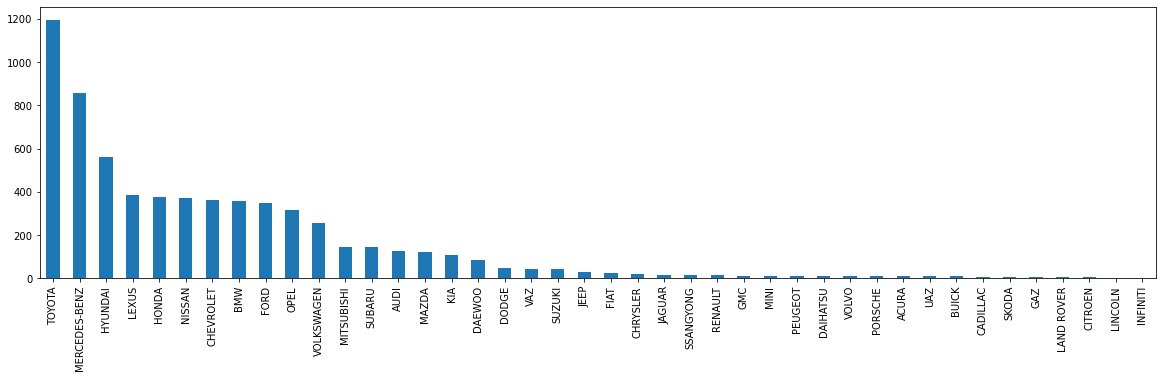

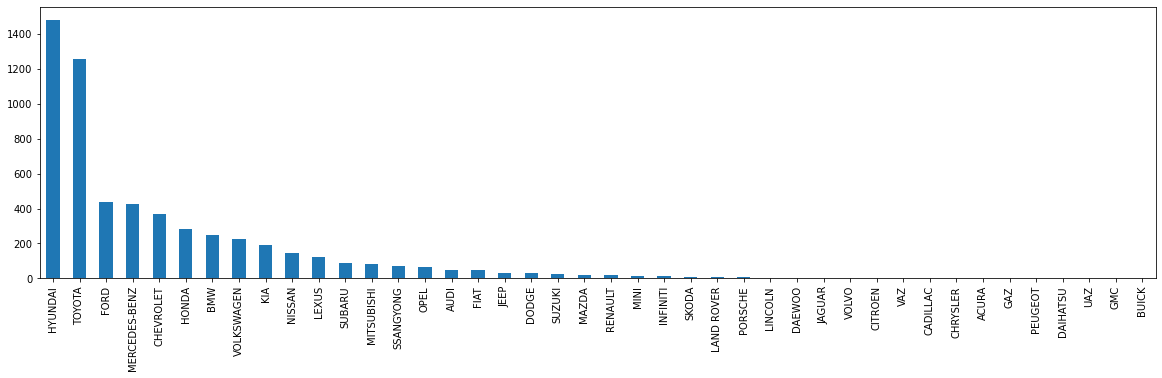

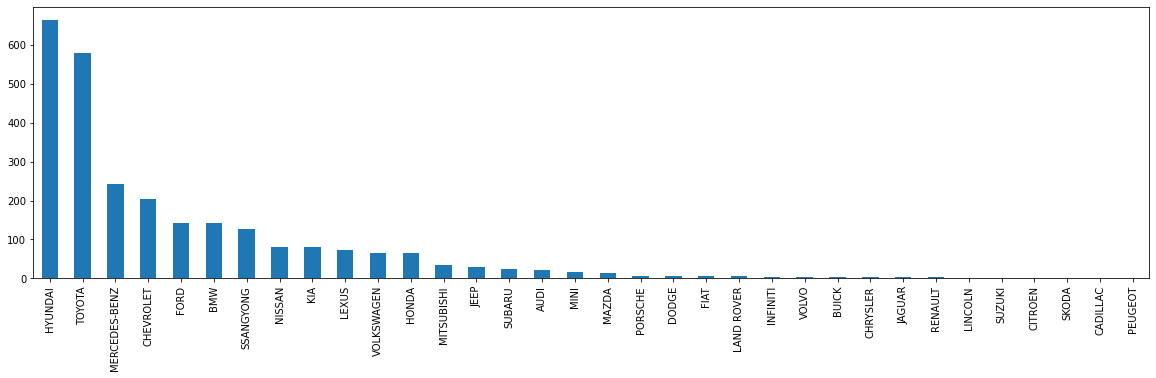

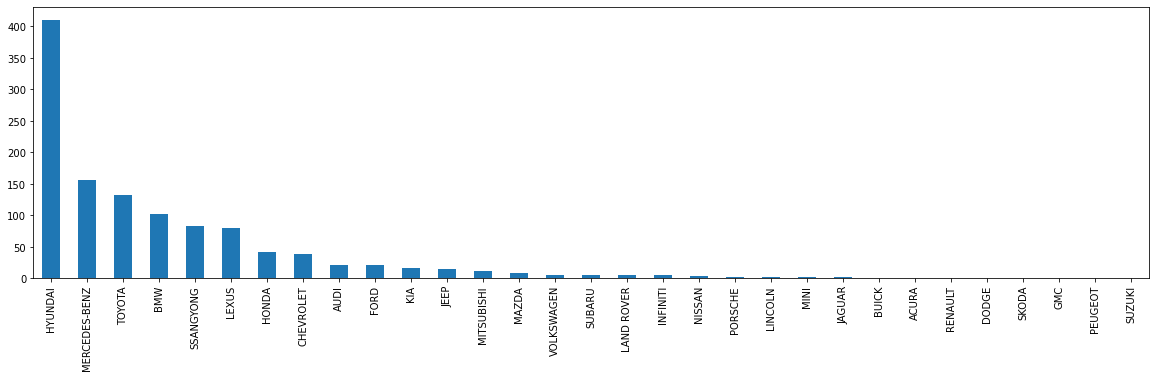

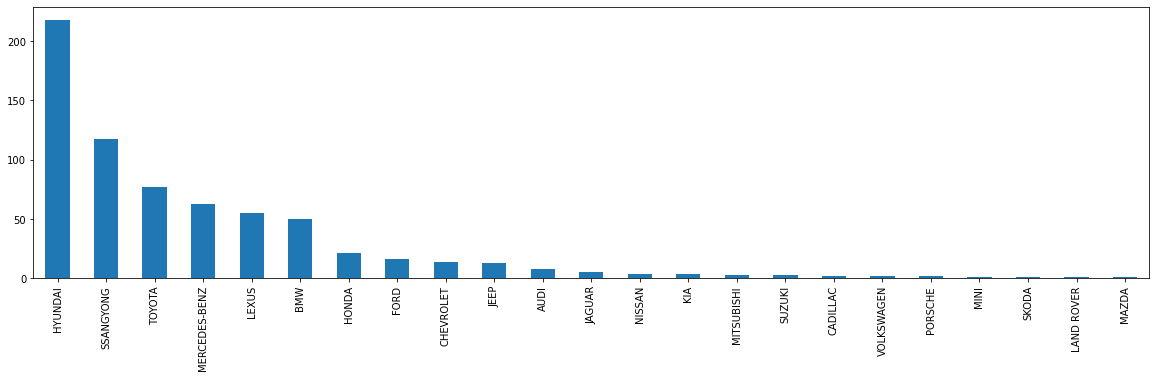

In [36]:
# find cars that are outliers in terms of the price bins they fall into

# eg: volkswagen general price range is within 25-30k usd 
# the ones in premium price bins have general characterstics 
# but yet the price is very high and this is unnecesary variance or an anomaly

train_df1_no_outlier_plus = train_df1_no_outlier_tax.copy(deep=True)

bins = [0, 10000, 20000, 30000, 40000, np.inf]
labels = ['low', 'medium', 'economy', 'high', 'premium']
train_df1_no_outlier_plus['Price_bins'] = pd.cut(train_df1_no_outlier_plus.Price, bins=bins, labels=labels )

for i in labels:
    temp_df = train_df1_no_outlier_plus[train_df1_no_outlier_plus['Price_bins']==i]
    temp_df.Manufacturer.value_counts().plot(kind='bar',figsize=(20,5))
    plt.show()

In [37]:
# removing recors that are anomolous based on the price bins they fall into and their characterestics

train_df1_no_outlier_plus = train_df1_no_outlier_plus[~((train_df1_no_outlier_plus.Manufacturer == 'SKODA') & (train_df1_no_outlier_plus.Price_bins == 'premium'))]

train_df1_no_outlier_plus = train_df1_no_outlier_plus[~((train_df1_no_outlier_plus.Manufacturer == 'mitsubishi') & (train_df1_no_outlier_plus.Price_bins == 'premium') &(train_df1_no_outlier_plus.Model == "outlander"))]

train_df1_no_outlier_plus = train_df1_no_outlier_plus[~((train_df1_no_outlier_plus.Manufacturer == 'volkswagen') & (train_df1_no_outlier_plus.Price_bins == 'premium'))]

In [72]:
train_df1_no_outlier_tax.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_Year', 'Category',
       'Leather_Interior', 'Fuel_Type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_Box_Type', 'Drive_Wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Is_No_Levy', 'Vehicle_Age', 'avg_mile_age',
       'avg_mileaperage_bins', 'Mile_bins', 'Manufacturer_woe', 'Color_woe',
       'Model_woe'],
      dtype='object')

In [38]:
train_df2 = train_df1_no_outlier.drop(columns=["Prod_Year"])
train_df3 = train_df1_no_outlier_tax.drop(columns=["Levy", "Is_No_Levy", "Prod_Year", "avg_mileaperage_bins", "avg_mile_age", "Cylinders",'Color_woe',"Manufacturer_woe"])
train_df4 = train_df1_no_outlier_plus.drop(columns=["Prod_Year", "avg_mileaperage_bins", "Mile_bins", "Is_No_Levy", 'avg_mile_age', 'Cylinders','Manufacturer_woe', 'Color_woe','Model_woe','Price_bins'])

In [39]:
test_df2 = test_df1.drop(columns=["Prod_Year","Mile_bins", 'Manufacturer_woe', 'Color_woe', 'Is_No_Levy']) 
test_df4 = test_df1.drop(columns=['Prod_Year', 'Manufacturer_woe', 'Color_woe','Model_woe','Cylinders', 'Is_No_Levy', 'Mile_bins'])

In [40]:
train_df4.corr(method='spearman')

,ID,Price,Levy,Leather_Interior,Engine_volume,Mileage,Airbags,Vehicle_Age
ID,1.000000,-0.005390,0.029811,0.133500,-0.052236,-0.032765,-0.050299,-0.007038
Price,-0.005390,1.000000,0.154184,0.026305,0.003531,-0.214350,-0.072871,-0.235509
Levy,0.029811,0.154184,1.000000,0.313138,0.171058,-0.129504,0.083459,-0.417079
Leather_Interior,0.133500,0.026305,0.313138,1.000000,0.294456,-0.017182,0.162439,-0.329371
Engine_volume,-0.052236,0.003531,0.171058,0.294456,1.000000,0.190388,0.242148,0.073821
Mileage,-0.032765,-0.214350,-0.129504,-0.017182,0.190388,1.000000,-0.039633,0.371046
Airbags,-0.050299,-0.072871,0.083459,0.162439,0.242148,-0.039633,1.000000,-0.187852
Vehicle_Age,-0.007038,-0.235509,-0.417079,-0.329371,0.073821,0.371046,-0.187852,1.000000


the final correlation matrix shows that mileage and vehicle age have the highest correlation to price

In [41]:
train_df4.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather_Interior', 'Fuel_Type', 'Engine_volume', 'Mileage',
       'Gear_Box_Type', 'Drive_Wheels', 'Doors', 'Wheel', 'Color', 'Airbags',
       'Vehicle_Age'],
      dtype='object')

In [42]:
test_df4.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Category', 'Leather_Interior',
       'Fuel_Type', 'Engine_volume', 'Mileage', 'Gear_Box_Type',
       'Drive_Wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Price',
       'Vehicle_Age'],
      dtype='object')

##################################################################################################################

##### Model 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_log_error, make_scorer
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import metrics 

In [ ]:
'''train_df2_scaled = train_df2.copy(deep=True)

log_normal_cols = ['Mileage']
for col in log_normal_cols:
    train_df2_scaled[col] = np.log(train_df2_scaled[col]+1)'''
    
    

In [ ]:
'''train_df2_scaled["Vehicle_Age"] = np.log(train_df2_scaled["Vehicle_Age"]+1)
train_df2_scaled["Vehicle_Age"] = train_df2_scaled["Vehicle_Age"].astype("int")'''

In [76]:
test_df2.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Category', 'Leather_Interior',
       'Fuel_Type', 'Engine_volume', 'Mileage', 'Cylinders', 'Gear_Box_Type',
       'Drive_Wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Price',
       'Is_No_Levy', 'Vehicle_Age', 'Color_woe', 'Model_woe',
       'Manufacturer_woe'],
      dtype='object')

In [45]:
# one hot encoding for categorical features
oh_enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(oh_enc.fit_transform(train_df4[['Manufacturer', 'Fuel_Type','Gear_Box_Type','Drive_Wheels', 'Category', 'Wheel', 'Doors', 'Color']]).toarray(),index=train_df4.index).join(train_df4)
train_enc = enc_df.drop(columns=['Manufacturer','Model','Fuel_Type','Gear_Box_Type','Drive_Wheels', 'Category', 'Wheel', 'Doors','Color'])

enc_df= pd.DataFrame(oh_enc.transform(test_df4[['Manufacturer','Fuel_Type','Gear_Box_Type','Drive_Wheels', 'Category', 'Wheel', 'Doors', 'Color']]).toarray(), index=test_df4.index).join(test_df4)
test_enc = enc_df.drop(columns=['Manufacturer','Model','Fuel_Type','Gear_Box_Type','Drive_Wheels', 'Category', 'Wheel', 'Doors','Color'])

In [46]:
X = train_enc.drop(columns=["Price", "ID"])
X_test = test_enc.drop(columns=["ID"])

y = train_enc['Price']

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=21)

##### Transformed Target Regressor with Ridge Regression

The assumption for this being that this would easily transform the output variable and make predictions since a normal distribution is the asssumption for linear based models and also ridge regression will take care of penalty for overvalued coefficients for multicollinear features

In [48]:
log_scale = ["Levy", "Vehicle_Age", "Mileage"]

X_train_scaled = X_train.copy(deep=True)
X_valid_scaled = X_valid.copy(deep=True)

for i in log_scale:
    X_train_scaled[i] = np.log(X_train_scaled[i]+1)
    X_valid_scaled[i] = np.log(X_valid_scaled[i]+1)

In [49]:
tt = TransformedTargetRegressor(regressor=Ridge(alpha=1), func=np.log, inverse_func=np.exp)
tt.fit(X_train, y_train)
tt.score(X_train, y_train)

-0.3022281369635771

In [50]:
tt = TransformedTargetRegressor(regressor=SVR(kernel='rbf', gamma='auto'), func=np.log, inverse_func=np.exp)
tt.fit(X_train_scaled, y_train)
tt.score(X_train_scaled, y_train)

0.611862652685053

In [52]:
from sklearn.linear_model import BayesianRidge

bay_ridge = BayesianRidge()
bay_ridge.fit(X_train_scaled, y_train)
bay_ridge.score(X_train_scaled, y_train)

0.3548357728625793

##### Tree based models

Being a tree based model random forest or xgboost should handle the categorical features well. 
also random forest should account for the overfitting or if the the variance itself is too high in train set then xgboost should be able to handle it

In [51]:
rfr = RandomForestRegressor(n_estimators = 350, max_depth=16, random_state = 21, oob_score=True, max_features=0.7, ccp_alpha=20000)
rfr.fit(X_train, y_train)
print("Train Score:{}".format(rfr.score(X_train, y_train)))

y_pred = rfr.predict(X_valid)
print("Validation Score:{}".format(r2_score(y_pred, y_valid)))

Train Score:0.902448092964268
Validation Score:0.7118305235546737


In [54]:
xgbr = XGBRegressor(n_estimators=100, max_depth=10, eta=0.3, eval_metric="rmsle",)
xgbr.fit(X_train, y_train)
print("Train Score:{}".format(xgbr.score(X_train, y_train)))

y_pred = xgbr.predict(X_valid)
print("Validation Score:{}".format(r2_score(y_pred, y_valid)))

Train Score:0.9810097081303466
Validation Score:0.7484711846962342


###################################################################################

##### Hyperparameter Tuning for XGBRegressor

In [59]:
dtrain = train_enc.drop(columns=["ID"])
target = "Price"

In [80]:


def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmsle', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Price'],eval_metric='rmsle')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #for i,v in enumerate(dtrain_predictions):
    #   if v< 0: dtrain_predictions[i]=0
        
    #Print model report:
    print("\nModel Report")
    print("R2 : %.4g" % metrics.r2_score(dtrain['Price'].values, dtrain_predictions))
    print("MSLE (Train): %f" % metrics.mean_squared_log_error(dtrain['Price'], dtrain_predictions))
    print("Best Iteration: {}".format(alg.get_booster().best_iteration))
                    

In [125]:
predictors = [x for x in dtrain.columns if x not in [target]]
xgb1 = XGBRegressor(objective="reg:squaredlogerror",
 learning_rate =0.5,
 n_estimators=2000,
 max_depth=32,
 min_child_weight=0.000005,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 seed=27)
modelfit(xgb1, dtrain, predictors)


Model Report
R2 : -0.7621
MSLE (Train): 1.826072
Best Iteration: 1999


In [97]:
#Choose all predictors except target & IDcols
predictors = [x for x in dtrain.columns if x not in [target]]
xgb1 = XGBRegressor(objective="reg:squarederror",
 learning_rate =0.06,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 seed=27)
modelfit(xgb1, dtrain, predictors)


Model Report
R2 : 0.7453
MSLE (Train): 0.336702
Best Iteration: 33


In [98]:

param_test1 = {
 'max_depth':range(8,24,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.05, n_estimators=33,
 objective= 'reg:squarederror', nthread=4, seed=27, eval_metric='rmsle'),
 param_grid = param_test1, scoring='neg_mean_squared_log_error',n_jobs=4, cv=5)
gsearch1.fit(dtrain[predictors],dtrain[target])
gsearch1.best_params_, gsearch1.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan -0.30557873         nan         nan
         nan         nan         nan -0.25073875         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
  warnings.warn(


({'max_depth': 14, 'min_child_weight': 1}, -0.25073874743496477)

In [99]:
# tuning gamma

param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.06, n_estimators=800, max_depth=14,
 min_child_weight=1,objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27, eval_metric='rmsle'), 
 param_grid = param_test3, scoring='neg_mean_squared_log_error',n_jobs=4, cv=5)
gsearch3.fit(dtrain[predictors],dtrain[target])
gsearch3.best_params_, gsearch3.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


({'gamma': 0.0}, nan)

In [102]:
# tune sub sample and col sample by tree

param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.06, n_estimators=800, max_depth=14,
 min_child_weight=1, gamma=0.0,objective= 'reg:squarederror', nthread=4,seed=27, eval_metric='rmsle'), 
 param_grid = param_test4, scoring='neg_mean_squared_log_error',n_jobs=4, cv=5)
gsearch4.fit(dtrain[predictors],dtrain[target])
gsearch4.best_params_, gsearch4.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


({'colsample_bytree': 0.6, 'subsample': 0.6}, nan)

In [104]:
param_test5 = {
 'subsample':[i/100.0 for i in range(60,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.06, n_estimators=800, max_depth=14,
 min_child_weight=1, gamma=0.0,
 objective= 'reg:squarederror', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='neg_mean_squared_log_error',n_jobs=4, cv=5)
gsearch5.fit(dtrain[predictors],dtrain[target])
gsearch5.best_params_, gsearch5.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


({'colsample_bytree': 0.75, 'subsample': 0.6}, nan)

In [113]:
# tuning regularization params

param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.06, n_estimators=800, max_depth=14,
 min_child_weight=1, gamma=0.1, subsample=0.75, colsample_bytree=0.6,
 objective= 'reg:squarederror', nthread=4,seed=27),
 param_grid = param_test6, scoring='neg_mean_squared_log_error',n_jobs=4, cv=5)
gsearch6.fit(dtrain[predictors],dtrain[target])
gsearch6.best_params_, gsearch6.best_score_

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


({'reg_alpha': 1e-05}, nan)

##### Final tuned XGBR model

In [115]:
xgbr1 = XGBRegressor(learning_rate =0.06, n_estimators=800, max_depth=14, eval_metric="rmsle",
                     min_child_weight=100, subsample=0.75, colsample_bytree=0.75,
                     reg_alpha=300,gamma=0.1, nthread=4,seed=27)
xgbr1.fit(X_train, y_train)
print(xgbr1.score(X_train, y_train))

y_pred = xgbr1.predict(X_valid)
print(r2_score(y_pred, y_valid))

0.8949509849907656
0.7272454582040322


##### Test set predictions

In [ ]:
y_test_pred = xgbr1.predict(X_test)

for i,v in enumerate(y_test_pred):
    
    if v < 0:
        
        y_test_pred[i] = 0
    
y_test_pred_series = pd.Series(y_test_pred)

output_df = pd.DataFrame(y_test_pred_series)

output_df.to_csv(r"E:\conda_workdir\hacks\loan prediction\used_car_pred_model2_sub_4.csv", index=False)

#################################################################################################

In [264]:
X_mpy = remove_outlier_by_iqr(X_mpy, "avg_mil_yr")
y = y[X_mpy.index]

In [265]:
X_train, X_valid, y_train, y_valid = train_test_split(X_mpy, y, test_size=0.33, shuffle=True, random_state=42)

In [281]:
'''
subsample=0.7, colsample_bytree=0.9,gamma=0.001, nthread=4,seed=27
'''

xgbr1 = XGBRegressor(learning_rate = 0.1, n_estimators=450, max_depth=12, eval_metric="rmsle", min_child_weight=100, reg_alpha=500)
xgbr1.fit(X_train, y_train)
print(xgbr1.score(X_train, y_train))

y_pred = xgbr1.predict(X_valid)
print(r2_score(y_pred, y_valid))

0.8477468639568403
0.6492506069514212


####################################################################################################################

##### Methods that were tried but the performance metrics did not seem to improve

This was tried based on assumption that if there are significant clusters in the data then we can try to do a regression within those clusters because even if the variance is high in that entire data the varaince within the cluster should be easily explained by the model.
However there was overfitting within cluster also

In [157]:
'''
X_scaled = X.copy(deep=True)

col_names = ['Levy','Engine_volume','Mileage','Airbags','Vehicle_Age']
features = X_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_scaled[col_names] = features'''

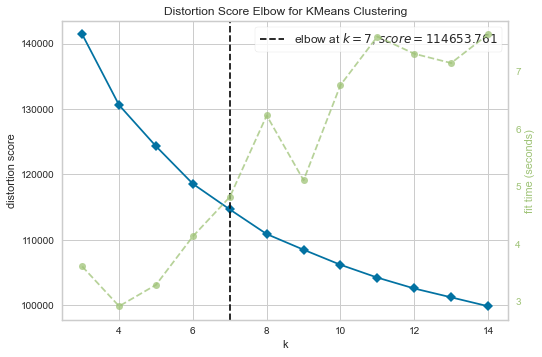

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
'''from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans()
visualizer = KElbowVisualizer(km, k=(3,15))

visualizer.fit(X_scaled)      
visualizer.show()  ''' 

In [160]:
'''clustering = KMeans(n_clusters=7, random_state=21,n_jobs=-1)
clustering.fit(X)

# apply the labels
train_labels = clustering.labels_
X_clstrs = X.copy(deep=True)
X_clstrs['clusters'] = train_labels'''

'''# predict labels on the test set
test_labels = clustering.predict(X_valid)
X_valid_clstrs = X_valid.copy()
X_valid_clstrs['clusters'] = test_labels'''

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


"# predict labels on the test set\ntest_labels = clustering.predict(X_valid)\nX_valid_clstrs = X_valid.copy()\nX_valid_clstrs['clusters'] = test_labels"

In [162]:
'''X_clusters1 = X_clstrs[['clusters']].join(train_df1_no_outlier_plus)'''

SpearmanrResult(correlation=-0.12887150539280656, pvalue=4.064557151972371e-13)


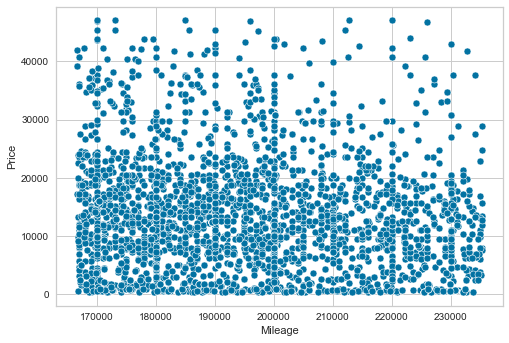

SpearmanrResult(correlation=-0.11263044102073616, pvalue=5.2929603523659465e-12)


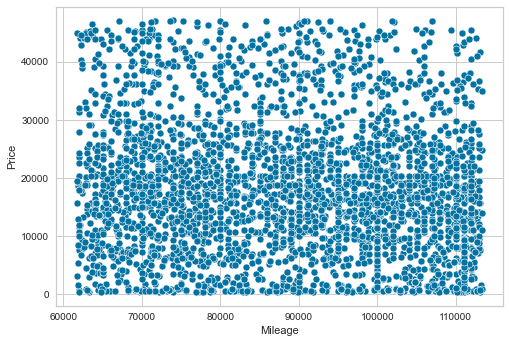

SpearmanrResult(correlation=0.03959564121398171, pvalue=0.006430573494551381)


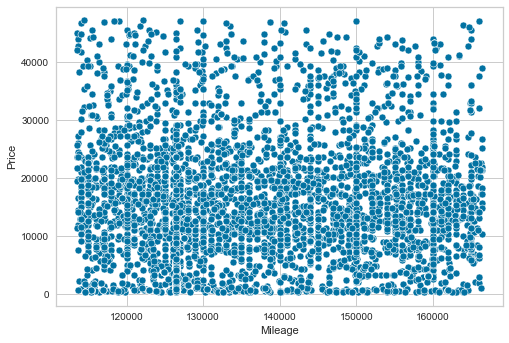

SpearmanrResult(correlation=-0.09857070247344472, pvalue=4.353783849451869e-05)


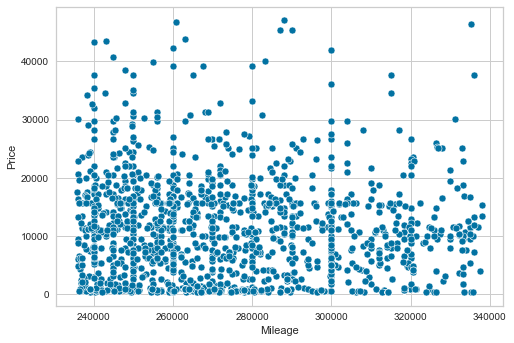

SpearmanrResult(correlation=-0.06771171104398085, pvalue=0.10695066111660503)


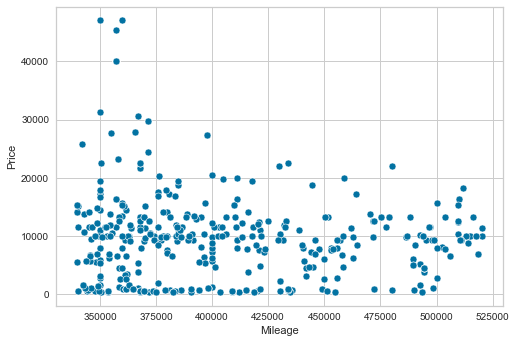

SpearmanrResult(correlation=0.17234771727941364, pvalue=3.8302363913598274e-20)


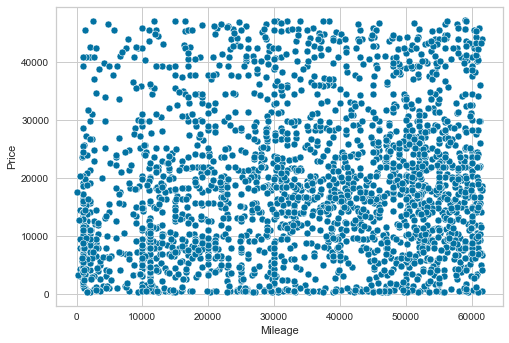

SpearmanrResult(correlation=0.05009001910063575, pvalue=0.5468393097300319)


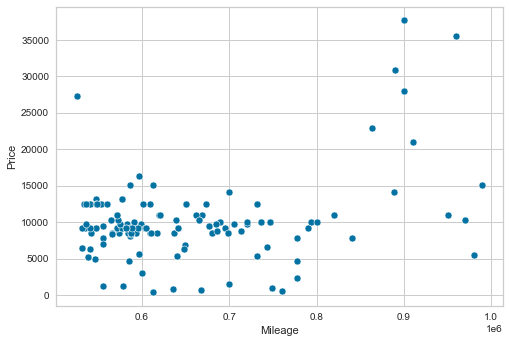

In [283]:
'''for i in X_clusters1.clusters.unique():
    temp_df =  X_clusters1[X_clusters1.clusters==i]
    sns.scatterplot(x=temp_df['Mileage'], y=temp_df['Price'])
    print(spearmanr(temp_df['Mileage'], temp_df['Price']))
    plt.show()'''

In [200]:
'''enc_df = pd.DataFrame(oh_enc.fit_transform(X_clusters1[['Manufacturer', 'Fuel_Type','Gear_Box_Type','Drive_Wheels', 'Category', 'Wheel', 'Doors', 'Color', 'Model']]).toarray(),index=X_clusters1.index).join(X_clusters1)
X_clusters1_enc = enc_df.drop(columns=['Manufacturer','Model','Fuel_Type','Gear_Box_Type','Drive_Wheels', 'Category', 'Wheel', 'Doors','Color','Price_bins'])'''

In [202]:
'''X_clusters1_enc = X_clusters1_enc.drop(columns=['Manufacturer_woe', 'Color_woe', 'Model_woe', 'Cylinders'])'''

In [233]:
'''i = 0
tempx=X_clusters1_enc[X_clusters1_enc.clusters==i].drop(columns=['Price', 'clusters', 'ID'])
tmpy=X_clusters1_enc[X_clusters1_enc.clusters==i]['Price']
    
xtrain, xvalid, ytrain, yvalid = train_test_split(tempx, tmpy, test_size=0.30, random_state=21)

rfr = RandomForestRegressor(n_estimators = 500, max_depth=8, random_state = 21, oob_score=True)
rfr.fit(xtrain, ytrain)
y_pred = rfr.predict(xvalid)
print(i, rfr.score(xtrain, ytrain), r2_score(y_pred, yvalid))'''
print("--------------------")

0 0.8267384236786472 0.6010513072373165
--------------------


In [ ]:
'''for i in range(0,7):
    train_x = X_train_clstrs[X_train_clstrs["clusters"] == i]
    train_y = y_train.filter(train_x.index)
    tt = TransformedTargetRegressor(regressor=LinearRegression(), func=np.log, inverse_func=np.exp)
    tt.fit(train_x, train_y)
    print(i, tt.score(train_x, train_y))'''

In [ ]:
'''
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {'objective':'reg:squaredlogerror', 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 16, 'alpha': 10, 'eta':0.3}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=400,early_stopping_rounds=10,metrics="rmsle", as_pandas=True, seed=123)
cv_results.head()'''

In [ ]:
'''np.sqrt(mean_squared_log_error(y_valid, y_pred))'''

In [ ]:
'''X_scaled = X.copy(deep=True)

col_names = ['Levy',
       'Engine_volume',       'Mileage',     'Cylinders',       'Airbags',
         'Vehicle_Age',     'Color_woe',     'Model_woe']
features = X_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_scaled[col_names] = features


neigh = KNeighborsRegressor(n_neighbors=7, weights='distance', metric='hamming')
neigh.fit(X_train, y_train)
print(neigh.score(X_train, y_train))

y_pred = neigh.predict(X_valid)
print(r2_score(y_pred, y_valid))'''

In [ ]:
'''
def RMSLE(y_true:np.ndarray, y_pred:np.ndarray) -> np.float64:
    """
        The Root Mean Squared Log Error (RMSLE) metric 
        
        :param y_true: The ground truth labels given in the dataset
        :param y_pred: Our predictions
        :return: The RMSLE score
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

'''

In [ ]:
'''
# define evaluation
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
# define search space
param_dist = {'learning_rate' : [0.05, 0.10, 0.20, 0.3, 0.4, 0.5],  
          'min_child_weight': [1, 5, 10],  
          'gamma': [0.5, 1, 5],  
          'subsample': [0.4, 0.6, 0.8, 1.0],  
          'colsample_bytree': [0.4, 0.6, 0.8, 1.0],  
           'max_depth': [4, 8, 16]  
         }  
# define search
search = RandomizedSearchCV(xgbr, param_distributions=param_dist, n_iter=50, scoring="neg_mean_squared_log_error", cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
'''

In [ ]:
'''best_xgb = result.best_estimator_'''

In [ ]:
'''best_xgb.fit(X_train, y_train)
best_xgb.score(X_train, y_train)

y_pred = best_xgb.predict(X_valid)
print(r2_score(y_pred, y_valid))'''

This was to see if the mile bins instead of mileage imporves the metrics

In [ ]:
'''
bins = [0,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, np.inf]
labels = [1,2,3,4,5,6,7,8,9,10, 11]
train_df1_no_outlier["Price_bins"] = pd.cut(train_df1_no_outlier.Mileage, bins=bins, labels=labels)

X = pd.get_dummies(train_df1_no_outlier.drop(columns=["Price", "ID", "Manufacturer_woe", "Color_woe", "Model_woe", "Mile_bins", "Price_bins"]))
y = train_df1_no_outlier['Price_bins']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30, random_state=21)

from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators = 1000, max_depth=16, random_state = 21, oob_score=True)
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)'''